In [2]:
import numpy as np
import math as m

In [3]:
h0 = 1e-4
x0 = 5
TestFunction = lambda x: (x**2)*np.sin(2*m.pi*x)

In [74]:
class DerivativeNum:
    
    def __init__(self, f, h, coeffs, hCoeffs):
        self.f = f
        self.h = h
        self.coeffs = coeffs
        self.hCoeffs = hCoeffs
    
    def getCoefficients(self):
        return self.coeffs
    
    def getHCoefficients(self):
        return self.hCoeffs
    
    def setCoefficients(self, coeffs):
        self.coeffs = coeffs
    
    def setHCoefficients(self, hCoeffs):
        self.hCoeffs = hCoeffs

    def __call__(self, x):
        f, h, coeffs, hCoeffs = self.f, self.h, self.coeffs, self.hCoeffs
        res = 0
        for i in range(len(coeffs)):
            res += 1 / h * coeffs[i] * f(x + hCoeffs[i] * h)
        return res

In [75]:
class DerivativeNum2(DerivativeNum):
    
    def __init__(self, f, h):
        DerivativeNum.__init__(self, f, h, \
                               [1, -1], \
                               [1, 0])

In [76]:
class DerivativeNum3(DerivativeNum):
    
    def __init__(self, f, h):
        DerivativeNum.__init__(self, f, h, \
                               [1, -1], \
                               [0, -1])

In [77]:
class DerivativeNum4(DerivativeNum):
    
    def __init__(self, f, h):
        DerivativeNum.__init__(self, f, h, \
                               [1 / 2, -1 / 2], \
                               [1, -1])

In [101]:
class DerivativeNum5(DerivativeNum):
    
    def __init__(self, f, h):
        DerivativeNum.__init__(self, f, h, \
                               [2 / 3, -2 / 3, -1 / 12, 1 / 12], \
                               [1, -1, 2, -2])

In [79]:
class DerivativeNum6(DerivativeNum):
    
    def __init__(self, f, h):
        DerivativeNum.__init__(self, f, h, \
                               [3 / 4, -3 / 4, -3 / 20, 3 / 20, 1 / 60, -1 / 60], \
                               [1, -1, 2, -2, 3, -3])

In [102]:
der = DerivativeNum5(TestFunction, h0)
print(der(x0))

157.079632679


In [98]:
steps = [2**(-(n-1)) for n in range(1, 21)]
print('Steps: ', steps)

Steps:  [1, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625, 0.00048828125, 0.000244140625, 0.0001220703125, 6.103515625e-05, 3.0517578125e-05, 1.52587890625e-05, 7.62939453125e-06, 3.814697265625e-06, 1.9073486328125e-06]


In [82]:
import sympy as smp
xSym = smp.Symbol('x')

smp.init_printing(use_latex='mathjax')
import IPython.display as ipy

In [83]:
functionsSym = [smp.sin(xSym ** 2), smp.cos(smp.sin(xSym)), smp.exp(smp.sin(smp.cos(xSym))), smp.log(xSym + 3), smp.sqrt(xSym + 3)] 

functions = [smp.lambdify(xSym, f) for f in functionsSym]

In [84]:
derivativesAnalyticalSym = [smp.diff(f, xSym) for f in functionsSym]
ipy.display(derivativesAnalyticalSym)

derivativesAnalytical = [smp.lambdify(xSym, f) \
                        for f in derivativesAnalyticalSym]
ipy.display(derivativesAnalytical)

⎡       ⎛ 2⎞                         sin(cos(x))                       1      
⎢2⋅x⋅cos⎝x ⎠, -sin(sin(x))⋅cos(x), -ℯ           ⋅sin(x)⋅cos(cos(x)), ─────, ──
⎢                                                                    x + 3    
⎣                                                                           2⋅

   1     ⎤
─────────⎥
  _______⎥
╲╱ x + 3 ⎦

[<function numpy.<lambda>>,
 <function numpy.<lambda>>,
 <function numpy.<lambda>>,
 <function numpy.<lambda>>,
 <function numpy.<lambda>>]

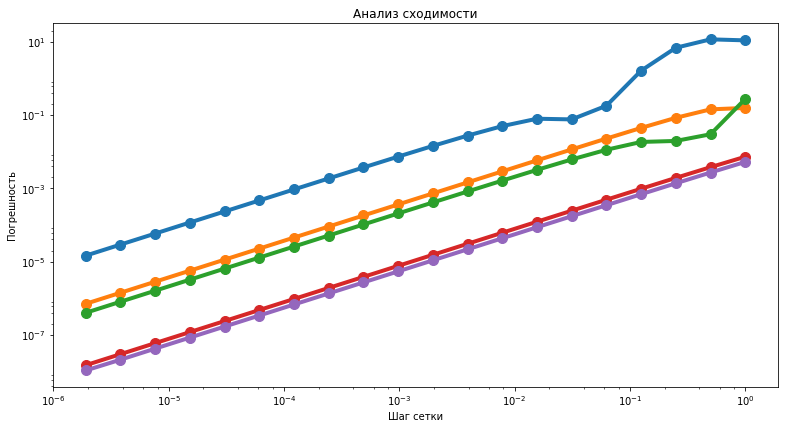

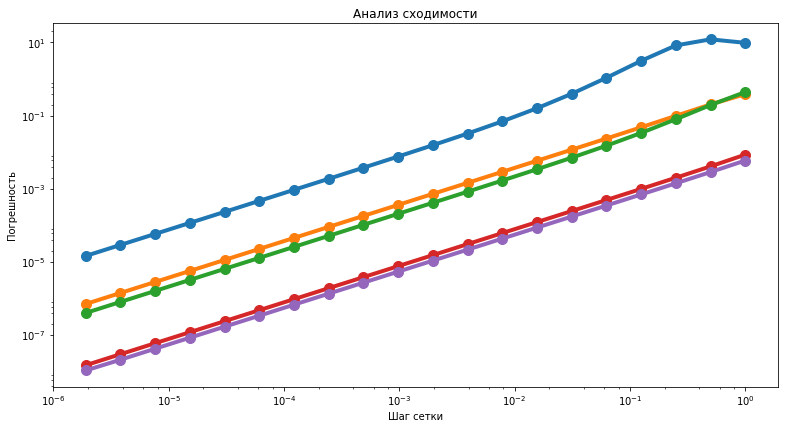

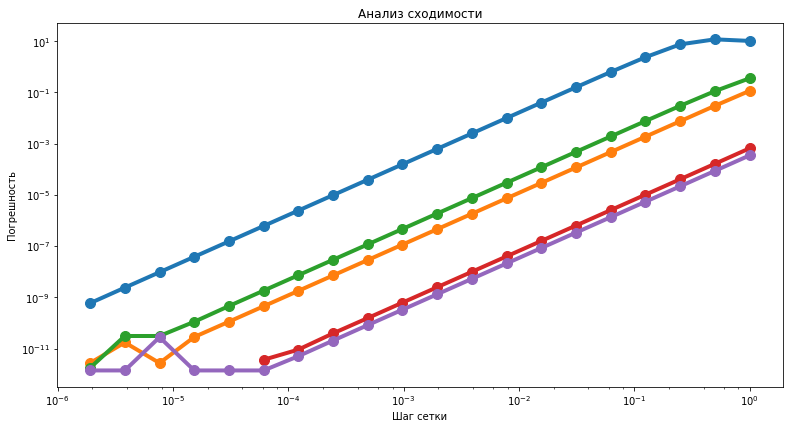

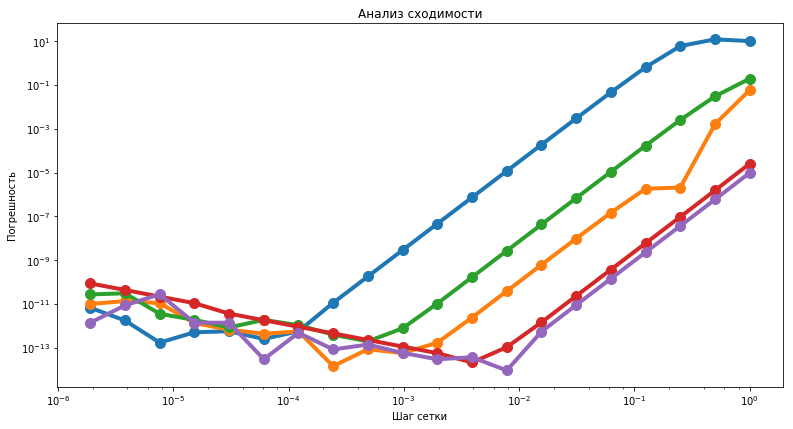

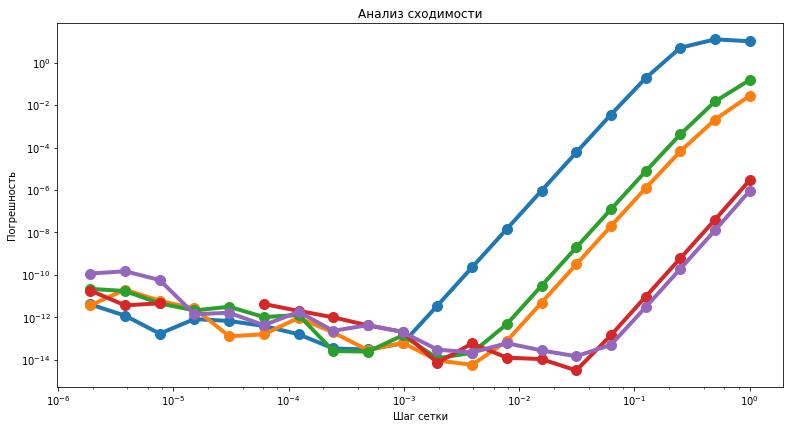

In [103]:
import matplotlib.pyplot as plt

figureSizeConst = (13, 6.7)

derivativeFuncs = [DerivativeNum2, DerivativeNum3, DerivativeNum4, DerivativeNum5, DerivativeNum6]

for derivativeFunc in derivativeFuncs:
    
    plt.figure(figsize=figureSizeConst)
    plt.title('Анализ сходимости')
    
    for f, dfdx in zip(functions, derivativesAnalytical):

            errors = []

            for h in steps:
                dfdxNum = derivativeFunc(f, h)

                error = np.fabs(dfdxNum(x0) - dfdx(x0))

                errors.append(error)

            #print(errors, '\n')
            plt.loglog(steps, errors, '-o', linewidth=4, markersize=10)

# Одна область построения - одна формула диффиренцирования. В каждой области графики всех функций.      

    plt.xlabel('Шаг сетки')
    plt.ylabel('Погрешность')
plt.show()

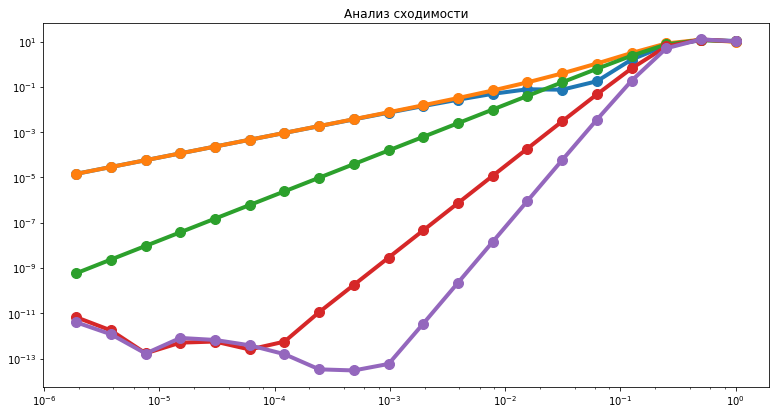

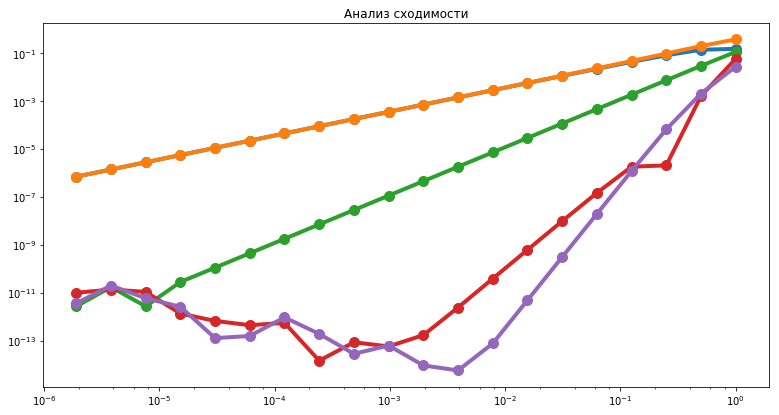

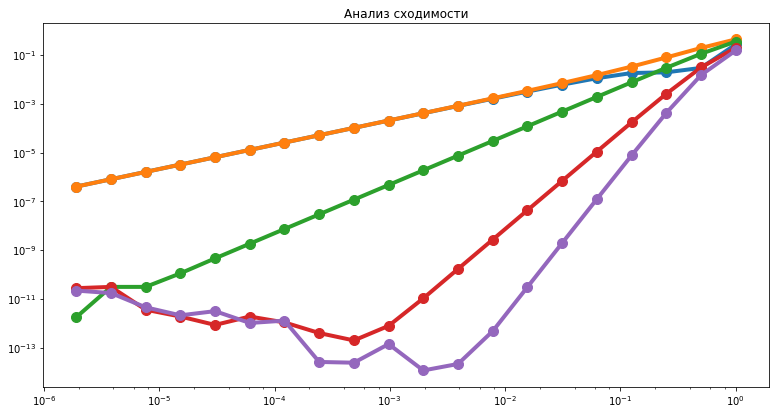

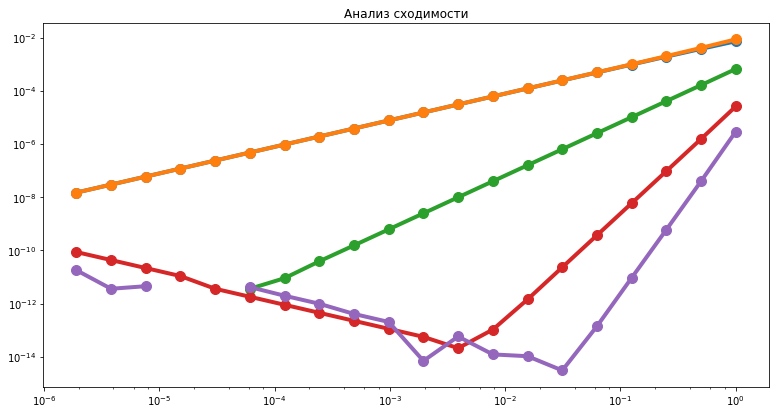

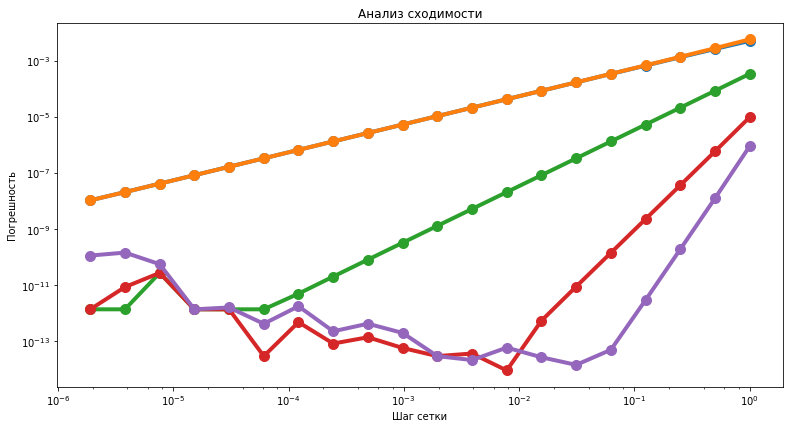

In [104]:

for f, dfdx in zip(functions, derivativesAnalytical):

        errors = []
        
        plt.figure(figsize=figureSizeConst)
        plt.title('Анализ сходимости')

        for derivativeFunc in derivativeFuncs:
            
            for h in steps:
                dfdxNum = derivativeFunc(f, h)

                error = np.fabs(dfdxNum(x0) - dfdx(x0))

                errors.append(error)

            #print(errors, '\n')
            plt.loglog(steps, errors, '-o', linewidth=4, markersize=10)
            errors.clear()

# Каждая область построения - одна функция. Во всех областях - все формулы диффиренцирования.

plt.xlabel('Шаг сетки')
plt.ylabel('Погрешность')
plt.show()
